# Session 10: Data Assembly (with Solutions)

## 1. Concatenating DataFrames

### Setting up

In [1]:
import pandas as pd
df1=pd.DataFrame([[1,3],[2,4]],columns=['A','B'])
df1

,A,B
0,1,3
1,2,4


In [2]:
df2=pd.DataFrame([[3,5],[4,6]],columns=['A','B'])
df2

,A,B
0,3,5
1,4,6


In [3]:
df3=pd.DataFrame([[1,1],[1,1]],columns=['B','C'])
df3

,B,C
0,1,1
1,1,1


### Vertical concatenation

In [4]:
df=pd.concat([df1,df2])
df

,A,B
0,1,3
1,2,4
0,3,5
1,4,6


In [5]:
df.loc[0,:]

,A,B
0,1,3
0,3,5


In [6]:
pd.concat([df1,df2],ignore_index=True)

,A,B
0,1,3
1,2,4
2,3,5
3,4,6


### Column names do not match

In [7]:
pd.concat([df1,df3],sort=False)

,A,B,C
0,1.0,3,NaN
1,2.0,4,NaN
0,NaN,1,1.0
1,NaN,1,1.0


In [8]:
pd.concat([df1,df3],join='inner')

,B
0,3
1,4
0,1
1,1


### Horizontal Concatenation

In [9]:
df=pd.concat([df1,df2],axis=1)
df

,A,B,A,B
0,1,3,3,5
1,2,4,4,6


In [10]:
df.T

,0,1
A,1,2
B,3,4
A,3,4
B,5,6


**Q1-a:** Vertically concatenate 3 copies of `df1` together and avoid repeated row labels. 

In [11]:
pd.concat([df1,df1,df1],ignore_index=True)

,A,B
0,1,3
1,2,4
2,1,3
3,2,4
4,1,3
5,2,4


**Q1-b:** Horizontally concatenate `df1` with the last column of `df3`.

In [12]:
pd.concat([df1,df3.iloc[:,-1]],axis=1)

,A,B,C
0,1,3,1
1,2,4,1


## Case 8: Analyzing Cancelled Courses by Department

Download the "Marshall Course Scheduling Data" from Blackboard->Datasets and extract all of the files into the current directory. Then run the following two code cells to load in the Marshall courses from the 2015-2016 and 2016-2017 academic years, as well as all the cancelled courses fromt the same years. Note that the column names of the two files are identical, which makes them suitable for concatenation.

In [2]:
import pandas as pd
courses=pd.read_excel('Marshall_Course_Enrollment_1516_1617.xlsx')
courses['Cancelled']=False
courses.columns

Index(['Course', 'Course Prefix', 'Course Suffix', 'Department',
       'First Begin Time', 'First Days', 'First End Time', 'First Instructor',
       'First Instructor UID', 'First Room', 'Link', 'Max Units', 'Min Units',
       'Mode', 'Reg Count', 'Seats', 'Second Begin Time', 'Second Days',
       'Second End Time', 'Second Instructor', 'Second Instructor UID',
       'Second Room', 'Section', 'Session', 'Term', 'Title', 'Cancelled'],
      dtype='object')

In [3]:
cancelled=pd.read_excel('Cancelled_Courses_1516_1617.xlsx')
cancelled['Cancelled']=True
cancelled.columns

Index(['Course', 'Course Prefix', 'Course Suffix', 'Department',
       'First Begin Time', 'First Days', 'First End Time', 'First Instructor',
       'First Instructor UID', 'First Room', 'Link', 'Max Units', 'Min Units',
       'Mode', 'Reg Count', 'Seats', 'Second Begin Time', 'Second Days',
       'Second End Time', 'Second Instructor', 'Second Instructor UID',
       'Second Room', 'Section', 'Session', 'Term', 'Title', 'Cancelled'],
      dtype='object')

**Concatenate the DataFrame "cancelled" at the bottom of the DataFrame "courses" and call the resulting DataFrame "combined", making sure that there are no two rows with the same row label.**

In [4]:
combined=pd.concat([courses,cancelled],ignore_index=True)
combined.head()

,Course,Course Prefix,Course Suffix,Department,First Begin Time,First Days,First End Time,First Instructor,First Instructor UID,First Room,...,Second Days,Second End Time,Second Instructor,Second Instructor UID,Second Room,Section,Session,Term,Title,Cancelled
0,ACCT-370,ACCT,370,ACCT,10:00:00,F,11:50:00,"Hopkins, Merle, W",3.783354e+09,SLH200,...,NaN,NaN,NaN,NaN,NaN,14029,1,20153,External Financial Reporting Issues,False
1,ACCT-370,ACCT,370,ACCT,08:00:00,MW,09:50:00,"Hopkins, Merle, W",3.783354e+09,ACC303,...,NaN,NaN,NaN,NaN,NaN,14025,1,20153,External Financial Reporting Issues,False
2,ACCT-370,ACCT,370,ACCT,10:00:00,MW,11:50:00,"Hopkins, Merle, W",3.783354e+09,ACC303,...,NaN,NaN,NaN,NaN,NaN,14026,1,20153,External Financial Reporting Issues,False
3,ACCT-370,ACCT,370,ACCT,12:00:00,MW,13:50:00,"Hopkins, Merle, W",3.783354e+09,ACC303,...,NaN,NaN,NaN,NaN,NaN,14027,1,20153,External Financial Reporting Issues,False
4,ACCT-371,ACCT,371,ACCT,10:00:00,F,11:50:00,NaN,NaN,SLH200,...,NaN,NaN,NaN,NaN,NaN,14044,1,20153,Introduction to Accounting Systems,False


Once you have done the above, you can run the following command to compare departments by percentage of proposed courses that were cancelled.

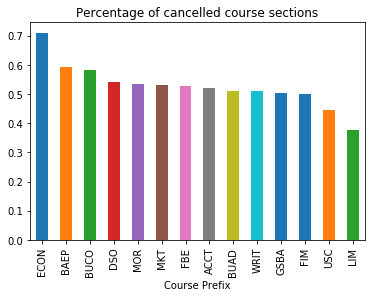

In [6]:
combined.groupby('Course Prefix')['Cancelled'].mean()\
    .sort_values(ascending=False)\
    .plot(kind='bar',title='Percentage of cancelled course sections')

## 2. Merging DataFrames
### Setting up

In [17]:
courses_small=courses[['First Room','Seats','Reg Count']].head(3)
courses_small

,First Room,Seats,Reg Count
0,SLH200,135,106
1,ACC303,42,24
2,ACC303,42,40


In [18]:
rooms=pd.DataFrame([['ACC303', 46],['JKP102',52]],columns=['Room','Size'])
rooms

,Room,Size
0,ACC303,46
1,JKP102,52


### Four kinds of merges

In [19]:
courses_small.merge(rooms,left_on='First Room',right_on='Room')

,First Room,Seats,Reg Count,Room,Size
0,ACC303,42,24,ACC303,46
1,ACC303,42,40,ACC303,46


In [20]:
courses_small.merge(rooms,left_on='First Room',right_on='Room',how='left')

,First Room,Seats,Reg Count,Room,Size
0,SLH200,135,106,NaN,NaN
1,ACC303,42,24,ACC303,46.0
2,ACC303,42,40,ACC303,46.0


In [21]:
courses_small.merge(rooms,left_on='First Room',right_on='Room',how='right')

,First Room,Seats,Reg Count,Room,Size
0,ACC303,42.0,24.0,ACC303,46
1,ACC303,42.0,40.0,ACC303,46
2,NaN,NaN,NaN,JKP102,52


In [22]:
courses_small.merge(rooms,left_on='First Room',right_on='Room',how='outer')

,First Room,Seats,Reg Count,Room,Size
0,SLH200,135.0,106.0,NaN,NaN
1,ACC303,42.0,24.0,ACC303,46.0
2,ACC303,42.0,40.0,ACC303,46.0
3,NaN,NaN,NaN,JKP102,52.0


**Q2:** In your own words, explain to your neighbor the difference between the following settings of "how" in the merge function: inner (default), left, right, and outer.

**Answer:** 

- inner: only keep rows in which there is a successful match between the two DataFrames.
- left: keep every row in the left DataFrame, but only keep rows in the right DataFrame that match to the left.
- right: keep every row in the right DataFrame, but only keep rows in the left DataFrame that match to the right.
- outer: keep every row in both DataFrames.

### Merging by Index

In [23]:
# Merging on row labels instead of column values
courses_small.merge(rooms,left_index=True,right_index=True)

,First Room,Seats,Reg Count,Room,Size
0,SLH200,135,106,ACC303,46
1,ACC303,42,24,JKP102,52


### Merging by Multiple Columns

In [24]:
courses_small['Building']=courses_small['First Room'].str.slice(0,3)
courses_small['Room']=courses_small['First Room'].str.slice(3).astype(int)
courses_small

,First Room,Seats,Reg Count,Building,Room
0,SLH200,135,106,SLH,200
1,ACC303,42,24,ACC,303
2,ACC303,42,40,ACC,303


In [25]:
rooms2=pd.DataFrame([['ACC',303, 46],['JKP',102,52]]\
                        ,columns=['Building','Room','Size'])
rooms2

,Building,Room,Size
0,ACC,303,46
1,JKP,102,52


In [26]:
courses_small.merge(rooms2,left_on=['Building','Room']\
                    ,right_on=['Building','Room'])

,First Room,Seats,Reg Count,Building,Room,Size
0,ACC303,42,24,ACC,303,46
1,ACC303,42,40,ACC,303,46


In [27]:
# Identical to the above if column names are the same in both DataFrames
courses_small.merge(rooms2,on=['Building','Room'])

,First Room,Seats,Reg Count,Building,Room,Size
0,ACC303,42,24,ACC,303,46
1,ACC303,42,40,ACC,303,46


## Case 9: Efficiency of Room Use in Marshall Course Scheduling

Run the following two cells to load in a smaller version of the scheduling data as well as the rooms data.

In [28]:
data=pd.read_excel('Marshall_Course_Enrollment_1516_1617.xlsx')\
   [['Term','Course','Section','Title','First Room','Department','Reg Count','Seats']]
data.head()

,Term,Course,Section,Title,First Room,Department,Reg Count,Seats
0,20153,ACCT-370,14029,External Financial Reporting Issues,SLH200,ACCT,106,135
1,20153,ACCT-370,14025,External Financial Reporting Issues,ACC303,ACCT,24,42
2,20153,ACCT-370,14026,External Financial Reporting Issues,ACC303,ACCT,40,42
3,20153,ACCT-370,14027,External Financial Reporting Issues,ACC303,ACCT,42,42
4,20153,ACCT-371,14044,Introduction to Accounting Systems,SLH200,ACCT,110,150


In [29]:
rooms=pd.read_excel('Marshall_Room_Capacity_Chart.xlsx',usecols=range(2))
rooms.head()

,Room,Size
0,ACC 306B,16
1,ACC201,48
2,ACC205,36
3,ACC236,39
4,ACC303,46


**Create a DataFrame called "data2" from an inner merge of the "data" DataFrame and the "rooms" DataFrame. Add a new column in "data2" called "ExtraSpace" which is the "Size" minus the "Seats" columns.**

In [30]:
data2=data.merge(rooms,left_on='First Room',right_on='Room')
data2['ExtraSpace']=data2['Size']-data2['Seats']
data2.head()

,Term,Course,Section,Title,First Room,Department,Reg Count,Seats,Room,Size,ExtraSpace
0,20153,ACCT-370,14025,External Financial Reporting Issues,ACC303,ACCT,24,42,ACC303,46,4
1,20153,ACCT-370,14026,External Financial Reporting Issues,ACC303,ACCT,40,42,ACC303,46,4
2,20153,ACCT-370,14027,External Financial Reporting Issues,ACC303,ACCT,42,42,ACC303,46,4
3,20153,ACCT-371,14040,Introduction to Accounting Systems,ACC303,ACCT,29,42,ACC303,46,4
4,20153,ACCT-371,14042,Introduction to Accounting Systems,ACC303,ACCT,40,42,ACC303,46,4


Once you finish the above, you can compare the wastage in room assignment by term and by department.

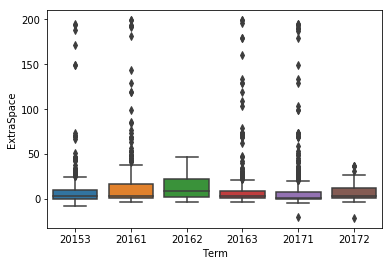

In [31]:
import seaborn as sns
sns.boxplot(x='Term',y='ExtraSpace',data=data2)

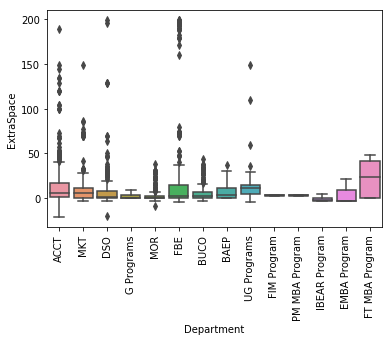

In [41]:
import matplotlib.pyplot as plt
sns.boxplot(x='Department',y='ExtraSpace',data=data2)
plt.xticks(rotation=90)
plt.show()

In [33]:
data2.query('Department=="FT MBA Program"')\
    .sort_values(by='ExtraSpace',ascending=False).head()

,Term,Course,Section,Title,First Room,Department,Reg Count,Seats,Room,Size,ExtraSpace
997,20161,GSBA-580C,15998,The Global Context of Business,JKP212,FT MBA Program,30,30,JKP212,78,48
1029,20171,GSBA-580C,15999,The Global Context of Business,JKP212,FT MBA Program,33,34,JKP212,78,44
998,20161,GSBA-580C,15999,The Global Context of Business,JKP212,FT MBA Program,35,35,JKP212,78,43
999,20161,GSBA-580C,16002,The Global Context of Business,JKP212,FT MBA Program,35,35,JKP212,78,43
1032,20171,GSBA-580C,16003,The Global Context of Business,JKP212,FT MBA Program,36,36,JKP212,78,42


## Case 10: Analyzing Popularity of Courses

Execute the below two code cells to load in the student course selection data and compute the number of students in each term who chose each course and section as their first choice.

In [34]:
students=pd.read_excel('Student_Course_Selection_1516.xlsx')
students.rename(columns={'Randomized Unique Identifier':'ID'},inplace=True)
students.head()

,ID,Major,Class,Owner,Objective,Term,Course,Title,Section,Instructor,# Students,Units,Enroll,Withdraw
0,1001,USC,O,USC,NONE,20163,ACCT-551T,Taxation of Partnerships and S-Corps,14222,"Mills, Patricia",8,3.0,L,NaN
1,1001,USC,O,USC,NONE,20163,ACCT-561T,Income Tax of Corporations and Their Shareholders,14236,"Keller, Joe",5,3.0,L,NaN
2,1001,USC,O,USC,NONE,20163,ACCT-568T,International Taxation,14248,"Werner, Maryanne, Sabido",5,3.0,L,NaN
3,1002,"ECON,IR",U4,"LASS,LASS","BA,BA",20163,ACCT-410,Foundations of Accounting,14092,"Karayan, John, E",12,4.0,L,NaN
4,1002,"ECON,IR",U4,"LASS,LASS","BA,BA",20163,DSO-401,Business Information Systems -- Spreadsheet Ap...,16214,"Pereira, Francis",8,2.0,PN,NaN


In [35]:
students['Rank']=students.groupby(['ID','Term']).cumcount()
topchoice=students.query('Rank==0')\
    .groupby(['Term','Course','Section'])['ID'].count().reset_index()
topchoice.rename(columns={'ID':'FirstChoice'},inplace=True)
topchoice.head()

,Term,Course,Section,FirstChoice
0,20153,ACCT-370,14025,24
1,20153,ACCT-370,14026,40
2,20153,ACCT-370,14027,42
3,20153,ACCT-371,14040,7
4,20153,ACCT-371,14041,1


**Merge the "topchoice" DataFrame above with the "data" DataFrame from Case 9, and call the result "data3". You should merge on Term, Course, and Section.**

In [36]:
data3=data.merge(topchoice,on=['Term','Course','Section'])
data3.head()

,Term,Course,Section,Title,First Room,Department,Reg Count,Seats,FirstChoice
0,20153,ACCT-370,14025,External Financial Reporting Issues,ACC303,ACCT,24,42,24
1,20153,ACCT-370,14026,External Financial Reporting Issues,ACC303,ACCT,40,42,40
2,20153,ACCT-370,14027,External Financial Reporting Issues,ACC303,ACCT,42,42,42
3,20153,ACCT-371,14040,Introduction to Accounting Systems,ACC303,ACCT,29,42,7
4,20153,ACCT-371,14042,Introduction to Accounting Systems,ACC303,ACCT,40,42,7


After you are done, you can run the following code to create a column "VeryDesirable" to identify course sections for which 80 percent of the registered students chose it as their first choice, and at least 20 students chose it as first choice. The second line produces a graph that compares department in the number of very desirable course sections. 

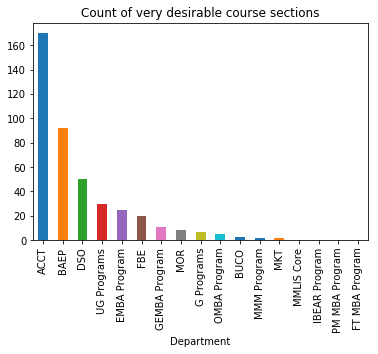

In [37]:
data3['VeryDesirable']=(data3['FirstChoice']>=data3['Reg Count']*0.8) \
    & (data3['FirstChoice']>20)
data3.groupby('Department')['VeryDesirable'].sum()\
    .sort_values(ascending=False)\
    .plot(kind='bar',title='Count of very desirable course sections')